In [1]:
# 데이터 구성 및 전처리
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 랜덤 포레스트 모델 및 평가
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
import graphviz
from subprocess import call

# 하이퍼파라미터 튜닝 (옵션)
from sklearn.model_selection import GridSearchCV

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image

# 그래프 한글 폰트 설정 (옵션)
matplotlib.rc("font", family="Nanum Gothic")
matplotlib.rc("axes", unicode_minus=False)

In [2]:
df = pd.read_csv("/home/piai/바탕화면/car/car_p.csv")

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

df

FileNotFoundError: [Errno 2] No such file or directory: '/home/piai/바탕화면/car/car_p.csv'

In [ ]:
#설명변수와 목표변수(price) 분리

df_x = df.drop("Price", axis=1)
df_y = df["Price"]

In [ ]:
#데이터 분리

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=2024)

df_train_y.fillna(0, inplace=True)
df_test_y.fillna(0, inplace=True)

df_train_x.fillna(0, inplace=True)
df_test_x.fillna(0, inplace=True)

In [ ]:
#기본 모델 생성 및 학습

rf_model = RandomForestRegressor(random_state=2024)
rf_model.fit(df_train_x, df_train_y)

#데이터 설명력 확인
print("Score on training set: {:.3f}".format(rf_model.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_model.score(df_test_x, df_test_y)))

Score on training set: 0.976
Score on test set: 0.897


In [ ]:
#기본모델 옵션 확인

rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2024,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#예측 및 평가

y_pred = rf_model.predict(df_test_x)

In [ ]:
# 모델 성능 평가

print("\nTrain Accuracy: {:.3f}".format(rf_model.score(df_train_x, df_train_y)))
print("Test Accuracy: {:.3f}".format(rf_model.score(df_test_x, df_test_y)))


Train Accuracy: 0.976
Test Accuracy: 0.897


In [ ]:
# 피처 중요도 시각화

importances = rf_model.feature_importances_
feature_names = df_train_x.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not found.
findfont: Font family 'Nanum Gothic' not

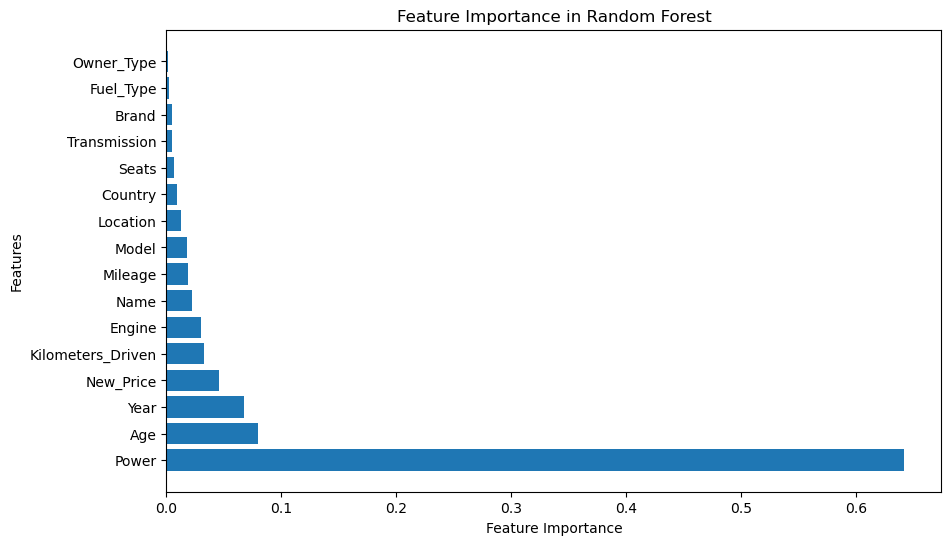

In [ ]:
# 변수별 중요도 그래프 출력

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

In [ ]:
#Best parameter 찾기 위한 grid 범위 설정 

param_grid = {
    'max_depth': [3, 5, 7], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
#grid_search로 Best parameter 확인

grid_search = GridSearchCV(RandomForestRegressor(random_state=2024), param_grid, cv=5, error_score='raise')
try:
    grid_search.fit(df_train_x, df_train_y)
except ValueError as e:
    print(f"GridSearchCV Error: {e}")

In [ ]:
#Best parameter 출력, 얻은 값을 활용한 final model setting

if grid_search.best_params_:
    best_params = grid_search.best_params_
    print("최적 하이퍼파라미터:", best_params)

    tree_final = RandomForestRegressor(**best_params, random_state=2024)
    tree_final.fit(df_train_x, df_train_y)

최적 하이퍼파라미터: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.216724 to fit


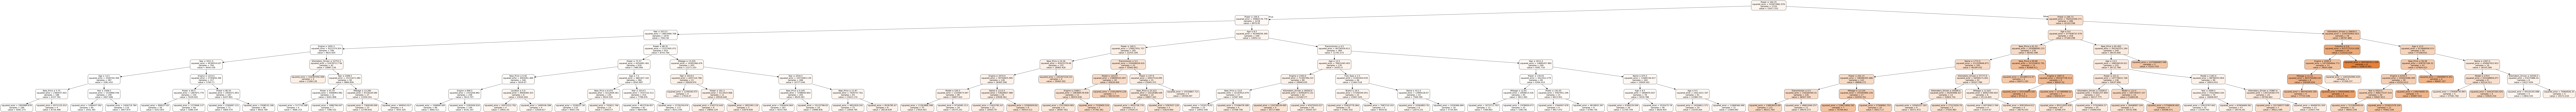

In [ ]:
#시각화

estimator = tree_final.estimators_[0]  #첫 번째 트리 선택

export_graphviz(estimator, out_file="car_p_tree.dot", 
                feature_names=df_train_x.columns, 
                filled=True, rounded=True, special_characters=True)

# .dot 파일을 읽어서 그래프로 출력
with open("car_p_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# .dot 파일을 .png로 변환
call(['dot', '-Tpng', 'car_p_tree.dot', '-o', 'car_p_tree.png', '-Gdpi=600'])

# Jupyter Notebook에서 이미지 출력
Image(filename='car_p_tree.png')